# Testing model using interpreter

In [1]:
# import library

import numpy as np
import tensorflow as tf

In [3]:
interpreter = tf.lite.Interpreter(model_path="2skin_model.tflite")
interpreter.allocate_tensors()

In [4]:
# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print(input_details)
print(output_details)

[{'name': 'serving_default_keras_layer_input:0', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[{'name': 'StatefulPartitionedCall:0', 'index': 177, 'shape': array([1, 2], dtype=int32), 'shape_signature': array([-1,  2], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [5]:
class_name = ['chickenpox', 'scabies']

Saving 28.JPG to 28.JPG


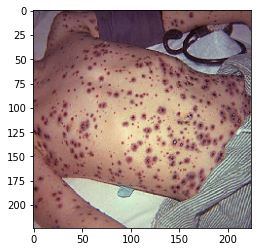


Predicting: 93.06% of chickenpox
[[0.9306406  0.06935938]]


In [34]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt

uploaded=files.upload()

for fn in uploaded.keys():
  path='/content/' + fn
  img=image.load_img(path, target_size=(224, 224))
  plt.imshow(img)
  plt.show()

  img = tf.keras.utils.img_to_array(img)
  img = img.astype(np.float32) / 255
  img = np.expand_dims(img, axis=0)
  images = np.vstack([img])

  input_shape = input_details[0]['shape']
  interpreter.set_tensor(input_details[0]['index'], images)

  interpreter.invoke()

  output_data = interpreter.get_tensor(output_details[0]['index'])
  pred = np.argmax(output_data, axis=1)

  print(f"\nPredicting: {(np.max(output_data))*100:.2f}% of {class_name[pred[0]]}")
  print(output_data)